### 자료 출처
- 데이터 다운로드 : LOCALDATA 웹 사이트 
- http://www.localdata.kr/
- 지방자치단체에서 인/허가한 업종별 데이터 제공
- 문화, 체육, 관광, 식품 등 11가지 분야에 걸쳐 다양한 데이터 검색 가능
- 회원 가입 절차를 별도로 거치지 않고도 공공데이터 다운로드 할 수 있음


In [2]:
# 필요한 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


- UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 1: invalid start byte
-  해결법 : 한글처리 방식 (cp949)

- DtypeWarning: Columns (22,27,39,41,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
- 여러타입의 데이터가 들어갔을 때 뜨는 경고
- low_memory=False

In [3]:
data=pd.read_csv('./data/서울특별시_일반음식점.csv',encoding='cp949',low_memory=False)


In [4]:
data.head(2)
data.tail(2)

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
472913,472914,일반음식점,07_24_04_P,3150000,3150000-101-2021-00072,20210203,NaN,3,폐업,2,...,0.0,NaN,0.0,0,N,75.60,NaN,NaN,NaN,NaN
472914,472915,일반음식점,07_24_04_P,3130000,3130000-101-2020-01013,20201208,NaN,3,폐업,2,...,0.0,NaN,0.0,0,N,22.75,NaN,NaN,NaN,NaN


In [5]:
# 데이터 개요 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472915 entries, 0 to 472914
Data columns (total 48 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   번호           472915 non-null  int64  
 1   개방서비스명       472915 non-null  object 
 2   개방서비스아이디     472915 non-null  object 
 3   개방자치단체코드     472915 non-null  int64  
 4   관리번호         472915 non-null  object 
 5   인허가일자        472915 non-null  int64  
 6   인허가취소일자      0 non-null       float64
 7   영업상태구분코드     472915 non-null  int64  
 8   영업상태명        472915 non-null  object 
 9   상세영업상태코드     472915 non-null  int64  
 10  상세영업상태명      472915 non-null  object 
 11  폐업일자         348707 non-null  float64
 12  휴업시작일자       0 non-null       float64
 13  휴업종료일자       0 non-null       float64
 14  재개업일자        0 non-null       float64
 15  소재지전화        327325 non-null  object 
 16  소재지면적        439015 non-null  object 
 17  소재지우편번호      472670 non-null  float64
 18  소재지전체주소      472678 non-

## contain함수
- 추출한 문자열 중에서 포함된 문자가 있는지 여부(True/False)
- 문자열이 아닌 NaN 에 대입하면 에러발생할 수 있으므로 na=False 파라미터 설정해야 험


In [14]:
# 필요한 컬럼만 추출
#set(data.위생업태명.values)
set(data.위생업태명[data.위생업태명.str.contains('통닭|치킨',na=False)])

{'통닭(치킨)', '호프/통닭'}

In [15]:
# 현재 영업중인 경우 영업상태명 확인
set(data.영업상태명)

{'영업/정상', '폐업'}

In [16]:
# 영어방태명이 영업/정상이고 위생업태명이 '통닭(치킨)'or'호프/통닭'인
#  data만 추출(조건 인덱싱)
# isin은 여러 조건식을 넣어 추출할 때 사용 1개라도 일치하면 True
# 시리즈 함수 .isin([데이터1,데이터2])
(data.영업상태명=='영업/정상') & data.위생업태명.isin(['통닭(치킨)','호프/통닭'])

0         False
1         False
2         False
3         False
4         False
          ...  
472910    False
472911    False
472912    False
472913    False
472914    False
Length: 472915, dtype: bool

In [17]:
data_fin=data[(data.영업상태명=='영업/정상') & data.위생업태명.isin(['통닭(치킨)','호프/통닭'])]


In [18]:
data_fin.head()
data_fin.tail()


,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
124130,124131,일반음식점,07_24_04_P,3120000,3120000-101-2021-00031,20210122,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,49.34,NaN,NaN,NaN,NaN
124151,124152,일반음식점,07_24_04_P,3160000,3160000-101-2020-00384,20201208,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,33.00,NaN,NaN,NaN,NaN
124171,124172,일반음식점,07_24_04_P,3200000,3200000-101-2020-00626,20201209,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,62.80,NaN,NaN,NaN,NaN
124193,124194,일반음식점,07_24_04_P,3060000,3060000-101-2021-00028,20210203,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,53.84,NaN,NaN,NaN,NaN
124203,124204,일반음식점,07_24_04_P,3080000,3080000-101-2021-00015,20210122,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,40.00,NaN,NaN,NaN,NaN


In [19]:
# 위생업태명
data_fin.위생업태명.head()
set(data_fin.위생업태명)

{'통닭(치킨)', '호프/통닭'}

In [20]:
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13110 entries, 30 to 124203
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   번호           13110 non-null  int64  
 1   개방서비스명       13110 non-null  object 
 2   개방서비스아이디     13110 non-null  object 
 3   개방자치단체코드     13110 non-null  int64  
 4   관리번호         13110 non-null  object 
 5   인허가일자        13110 non-null  int64  
 6   인허가취소일자      0 non-null      float64
 7   영업상태구분코드     13110 non-null  int64  
 8   영업상태명        13110 non-null  object 
 9   상세영업상태코드     13110 non-null  int64  
 10  상세영업상태명      13110 non-null  object 
 11  폐업일자         0 non-null      float64
 12  휴업시작일자       0 non-null      float64
 13  휴업종료일자       0 non-null      float64
 14  재개업일자        0 non-null      float64
 15  소재지전화        6536 non-null   object 
 16  소재지면적        12677 non-null  object 
 17  소재지우편번호      13103 non-null  float64
 18  소재지전체주소      13103 non-null  object 
 19  도로

In [31]:
# 서대문구 데이터만 추출
# 서대문구 각 동에 치킨칩이 몇 개 있는지
# 필요 컬럼(소재지전체주소, 위생업태명)
data_fin=data_fin[['소재지전체주소','위생업태명']]
data_fin.head()

,소재지전체주소,위생업태명
30,서울특별시 은평구 갈현동 400-9번지 (지하1층),호프/통닭
43,서울특별시 영등포구 양평동3가 101번지 현대아파트 상가내 1층 102호,호프/통닭
44,서울특별시 중구 필동2가 32-24번지 1층,호프/통닭
66,서울특별시 종로구 당주동 128-17번지 (지상1층),호프/통닭
67,서울특별시 서초구 우면동 59번지 105호,호프/통닭


In [32]:
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13110 entries, 30 to 124203
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   소재지전체주소  13103 non-null  object
 1   위생업태명    13110 non-null  object
dtypes: object(2)
memory usage: 307.3+ KB


In [26]:
# data_fim df는 서울시 치킨집 주소 데이터
res=data_fin.소재지전체주소.str.contains('서대문구',na=False)
res

30        False
43        False
44        False
66        False
67        False
          ...  
124130     True
124151    False
124171    False
124193    False
124203    False
Name: 소재지전체주소, Length: 13110, dtype: bool

In [23]:
data_seo=data_fin[res]
data_seo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 178 to 124130
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   소재지전체주소  400 non-null    object
 1   위생업태명    400 non-null    object
dtypes: object(2)
memory usage: 9.4+ KB


In [27]:
# 소재지전체주소 열에서 XXX동만 남기고 이후 상세 주소는 삭제
# 모든 데이터가 서대문구 이므로 동데이터만 남김
# 일부 글자만 추출하는 str.slice() 함수 사용
# '서울특별시 서대문구 ' 다음 글자에서 'xxx동'까지 추출
# 11번째 글자에서 16번째 글자까지 추출
addr = data_seo.소재지전체주소.str.slice(start=11,stop=17)
addr

178       창천동 33
698       홍제동 45
724       남가좌동 3
1200      연희동 13
1405      창천동 52
           ...  
122500    남가좌동 3
123490    홍제동 30
123548    홍제동 96
123724    북아현동 1
124130    남가좌동 3
Name: 소재지전체주소, Length: 400, dtype: object

In [47]:
# 동 뒤에 나온 숫자 제거
addr=addr.str.replace('[0-9]','')
addr

C:\Users\JungHun.DESKTOP-JRGUSS9\AppData\Local\Temp\ipykernel_13160\4127667440.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  addr=addr.str.replace('[0-9]','')


178        창천동 
698        홍제동 
724       남가좌동 
1200       연희동 
1405       창천동 
          ...  
122500    남가좌동 
123490     홍제동 
123548     홍제동 
123724    북아현동 
124130    남가좌동 
Name: 소재지전체주소, Length: 400, dtype: object

In [48]:
# 동 앞뒤의 띄어쓰기 제거
addr=addr.str.replace(' ','')
addr

178        창천동
698        홍제동
724       남가좌동
1200       연희동
1405       창천동
          ... 
122500    남가좌동
123490     홍제동
123548     홍제동
123724    북아현동
124130    남가좌동
Name: 소재지전체주소, Length: 400, dtype: object

In [51]:
addr=addr.str.replace('-','')

In [53]:
addr=addr.str.replace('옥천동번','옥천동')

In [55]:
# 동별 치킨집 개수 ( 동 뒤에 -제거)
ck_cnt=addr.value_counts()

In [62]:
# 트리맵시각화
import squarify


In [60]:
%pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

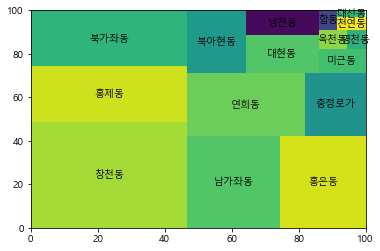

In [64]:
squarify.plot(ck_cnt,label=ck_cnt.index)